In [76]:
import numpy as np
import torch
from torch.autograd import Variable
import torch.nn as nn
import torch.optim as optim
import matplotlib.image as mpimg
from skimage.transform import resize
import matplotlib.pyplot as plt

In [77]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN,self).__init__()
        
        # Defining CNN
        # Conv Architecture:
        '''
        conv2d->ReLU->conv2d->ReLU->BatchNorm->maxpool2d(32x32=>16x16)->
        conv2d->ReLU->conv2d->ReLU->BatchNorm->maxpool2d(16x16=>8x8)->Dropout->
        conv2d->ReLU->conv2d->ReLU->BatchNorm->maxpool2d(8x8=>4X4)->
        Classifier
        '''
        self.cnn = nn.Sequential(nn.Conv2d(3,32,3,1,1),
                                 nn.ReLU(inplace = True),
                                 nn.BatchNorm2d(32),
                                 nn.Conv2d(32,64,3,1,1),
                                 nn.ReLU(inplace = True),
                                 nn.BatchNorm2d(64),
                                 nn.MaxPool2d(2,2),
                                 
                                 nn.Conv2d(64,128,3,1,1),
                                 nn.ReLU(inplace = True),
                                 nn.BatchNorm2d(128),
                                 nn.Conv2d(128,256,3,1,1),
                                 nn.ReLU(inplace = True),
                                 nn.BatchNorm2d(256),
                                 nn.MaxPool2d(2,2),
                                 nn.Dropout2d(p=0.3),
                                 
                                 nn.Conv2d(256,512,3,1,1),
                                 nn.ReLU(inplace = True),
                                 nn.BatchNorm2d(512),
                                 nn.Conv2d(512,512,3,1,1),
                                 nn.ReLU(inplace = True),
                                 nn.BatchNorm2d(512),
                                 nn.MaxPool2d(2,2)
                                )
        
        # Defining Classifier
        # Classifier Architecture:
        '''
        CNN->Flatten->
        Linear->ReLU->
        Linear->ReLU->Dropout->
        Linear->ReLU->
        Linear-> Scores
        '''
        self.classifier = nn.Sequential(nn.Linear(8192,2048),
                                        nn.ReLU(inplace=True),
                                        
                                        nn.Linear(2048,1024),
                                        nn.ReLU(inplace=True),
                                        nn.Dropout(p=0.3),
                                        
                                        nn.Linear(1024,512),
                                        nn.ReLU(inplace=True),
                                        
                                        nn.Linear(512,10)
                                       )
        
    def forward(self,x):
        
        # Forward Propagation 
        x = self.cnn(x)
        x = x.reshape(-1,4*4*512)
        x = self.classifier(x)
        
        return x
    

In [78]:
model = torch.load('cnn.pt')

In [82]:
def predict(path):
    
    classes = ('airplane', 'automobile', 'bird', 'cat', 'deer', 
               'dog', 'frog', 'horse', 'ship', 'truck')
    img_ori = mpimg.imread(path)
    
    img_re=resize(img_ori,(32,32))
    img_re = img_re.reshape(1,32,32,3)
    img_re = np.transpose(img_re,(0,3,1,2))
    img = torch.tensor(img_re).float().cuda()
    
    y = model(img)
    label = classes[torch.argmax(y)]
    
    plt.imshow(img_ori)
    plt.title(label)
    plt.show

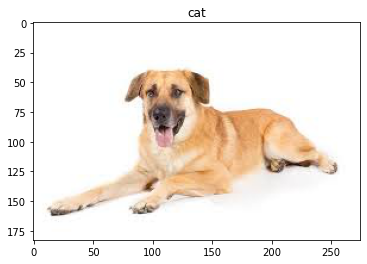

In [87]:
predict('test_2.jpg')